1.0501074113856068
Variance of old data is greater than new data
Degree of freedom 1: 19
Degree of freedom 2: 19
F-statistic: 1.0501074113856068
F test p-value: 0.5418760524826967
------------------------------------------------------------------------
new is better than old
No significant difference between old and new


,old_data,new_data
Mean,33.4500,40.5000
Variance,154.3658,147.0000
Observation,20.0000,20.0000
Pooled Variance,150.6829,150.6829
df,38.0000,38.0000
t Stat,-1.8162,NaN
P(T<=t) one-tail,0.0386,NaN
t Critical one-tail,1.6860,NaN
P(T<=t) two-tail,0.0772,NaN
t Critical two-tail,2.0244,NaN


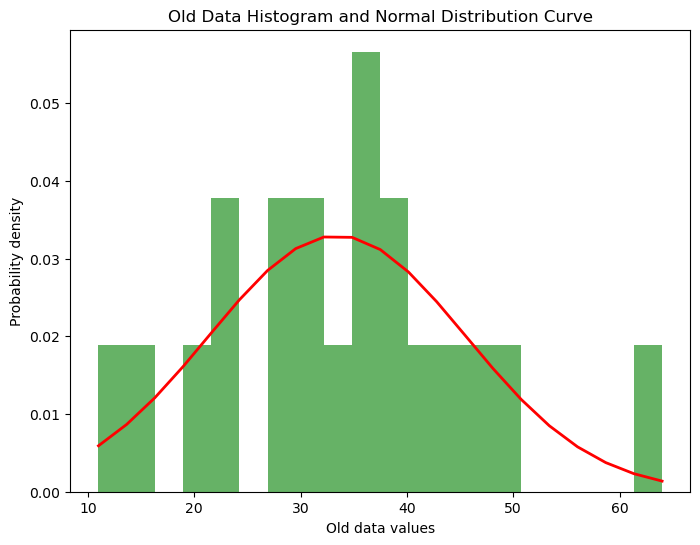

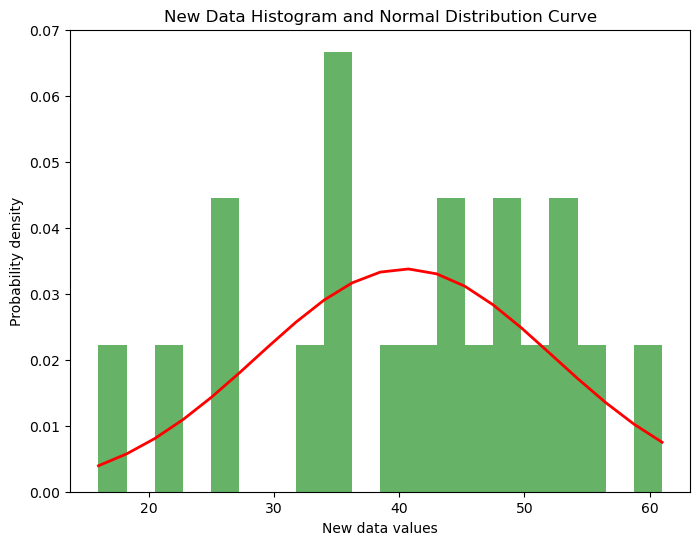

In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


old_dt =np.array([11,15,19,22,24,27,28,30,31,33,35,36,37,38,39,42,43,46,49,64])
old_dt_df = pd.DataFrame(old_dt)
new_dt = np.array([16,21,25,27,32,34,35,36,40,41,43,44,47,48,49,50,52,54,55,61])
new_dt_df = pd.DataFrame(new_dt)


plt.figure(figsize=(8, 6))
# because of the number of dataset has 20, the bins is defined as 20
count, bins, ignored = plt.hist(old_dt, 20, density=True, alpha=0.6, color='g')

mu, std = stats.norm.fit(old_dt)
p = stats.norm.pdf(bins, mu, std)
plt.plot(bins, p, linewidth=2, color='r')
plt.title('Old Data Histogram and Normal Distribution Curve')
plt.xlabel('Old data values')
plt.ylabel('Probability density')

# Show the plot with non-scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
# plt.show()

plt.figure(figsize=(8, 6))
# because of the number of dataset has 20, the bins is defined as 20
count, bins, ignored = plt.hist(new_dt, 20, density=True, alpha=0.6, color='g')

mu, std = stats.norm.fit(new_dt)
p = stats.norm.pdf(bins, mu, std)
plt.plot(bins, p, linewidth=2, color='r')
plt.title('New Data Histogram and Normal Distribution Curve')
plt.xlabel('New data values')
plt.ylabel('Probability density')

# Show the plot with non-scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
# plt.show()
# n1 = len(old_dt)
# k1 = int(1 + 3.322 * np.log10(n1))
# # k以便进行分析或绘制直方图。
# classrange = np.ptp(old_dt)/k1
# print(k1)
# print(classrange)

# n2 = len(new_dt)
# k2 = int(1 + 3.322 * np.log10(n2))
# # k以便进行分析或绘制直方图。
# classrange = np.ptp(new_dt)/k2
# print(k2)
# print(classrange)

# F test
variance1 = np.var(old_dt, ddof = 1)
variance2 = np.var(new_dt, ddof = 1)

f_value  = variance1/variance2
print(f_value)

if f_value > 1:
    print("Variance of old data is greater than new data")
else:
    print("Variance of new data is greater than old data")

df1 = len(old_dt) -1
df2 = len(new_dt) -1
p_value = stats.f.cdf(f_value, df1, df2)
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("F test p-value:", p_value)

print("------------------------------------------------------------------------")

# T test
desc_stats_old = {
    "Mean": np.mean(old_dt),
    "Variance": np.var(old_dt, ddof=1),
    "Observation": len(old_dt)
}

desc_stats_new = {
    "Mean": np.mean(new_dt),
    "Variance": np.var(new_dt, ddof=1),
    "Observation": len(new_dt)
}

t_stat, p_value_two_tail = stats.ttest_ind(old_dt, new_dt, equal_var = True)
df = len(old_dt) + len(new_dt) - 2
p_value_one_tail = p_value_two_tail/2
pooled_variance = ((len(old_dt) - 1) * desc_stats_old['Variance'] + (len(new_dt) - 1) * desc_stats_new['Variance']) / df

# t critical values for one-tail and two-tail
t_critical_one_tail = stats.t.ppf(1 - 0.05, df)
t_critical_two_tail = stats.t.ppf(1 - 0.025, df)

# Compile descriptive statistics into a DataFrame for display
desc_stats_df = pd.DataFrame([desc_stats_old, desc_stats_new], index=['old_data', 'new_data']).T
desc_stats_df.loc['Pooled Variance', :] = pooled_variance
desc_stats_df.loc['df', :] = df
desc_stats_df.loc['t Stat', 'old_data'] = t_stat
desc_stats_df.loc['P(T<=t) one-tail', 'old_data'] = p_value_one_tail
desc_stats_df.loc['t Critical one-tail', 'old_data'] = t_critical_one_tail
desc_stats_df.loc['P(T<=t) two-tail', 'old_data'] = p_value_two_tail
desc_stats_df.loc['t Critical two-tail', 'old_data'] = t_critical_two_tail

# Convert the DataFrame to display float values without scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

if p_value_one_tail > 0.05:
    print("old is better than new")
else:
    print("new is better than old")

if p_value_two_tail > 0.05:
    print("No significant difference between old and new")
else:
    print("There are significant differences between the old and new")

desc_stats_df

   
